In [1]:
!pip install -q ultralytics
from ultralytics import YOLO

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.0 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 80.1 MB/s eta 0:00:00:00:0100:01
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.c

In [2]:
!curl -L "https://app.roboflow.com/ds/OaoXYpwYKS?key=NgfH8U6zxJ" > roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   903  100   903    0     0   4276      0 --:--:-- --:--:-- --:--:--  4279
100 80.7M  100 80.7M    0     0   102M      0 --:--:-- --:--:-- --:--:--  256M


In [3]:
!unzip -o /kaggle/working/roboflow.zip -d /kaggle/working/roboflow_dataset

Archive:  /kaggle/working/roboflow.zip
  inflating: /kaggle/working/roboflow_dataset/README.dataset.txt  
  inflating: /kaggle/working/roboflow_dataset/README.roboflow.txt  
  inflating: /kaggle/working/roboflow_dataset/data.yaml  
   creating: /kaggle/working/roboflow_dataset/test/
   creating: /kaggle/working/roboflow_dataset/test/images/
 extracting: /kaggle/working/roboflow_dataset/test/images/1-2421-_jpg.rf.59201c1f41bb3582440ea6c9a5bfe520.jpg  
 extracting: /kaggle/working/roboflow_dataset/test/images/1-2424-_jpg.rf.e8699d650dcde20ed9327dbf3a524d5a.jpg  
 extracting: /kaggle/working/roboflow_dataset/test/images/1-2426-_jpg.rf.168ac66411c5fcec08c5c52c8c4839b0.jpg  
 extracting: /kaggle/working/roboflow_dataset/test/images/1-2706-_jpg.rf.8285814a2228748f85b0703fb6e2e799.jpg  
 extracting: /kaggle/working/roboflow_dataset/test/images/1-2708-_jpg.rf.6759a4d3c817c7731d0b1270cd0c1f7f.jpg  
 extracting: /kaggle/working/roboflow_dataset/test/images/1-2710-_jpg.rf.05d3f5cd8ae42e6d5b8a8b08

In [4]:
!cat /kaggle/working/roboflow_dataset/data.yaml

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 1
names: ['Face']

roboflow:
  workspace: cdac-n7gpv
  project: face-detection-v7eo3-axpa1
  version: 2
  license: CC BY 4.0
  url: https://universe.roboflow.com/cdac-n7gpv/face-detection-v7eo3-axpa1/dataset/2

In [5]:
model = YOLO("yolov8n.pt")  # You can change to yolov8s.pt, yolov8m.pt, etc.

model.train(
    data="roboflow_dataset/data.yaml",
    epochs=5,
    imgsz=416,
    batch=16,
    name="roboflow_yolov8"
)

100%|██████████| 6.25M/6.25M [00:00<00:00, 79.2MB/s]


Ultralytics 8.3.156 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=roboflow_dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=5, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=416, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=roboflow_yolov8, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pre

100%|██████████| 755k/755k [00:00<00:00, 17.4MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 70.8MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 842.0±307.0 MB/s, size: 59.0 KB)


train: Scanning /kaggle/working/roboflow_dataset/train/labels... 810 images, 24 backgrounds, 0 corrupt: 100%|██████████| 810/810 [00:00<00:00, 1514.86it/s]

train: New cache created: /kaggle/working/roboflow_dataset/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 372.8±232.4 MB/s, size: 34.4 KB)


val: Scanning /kaggle/working/roboflow_dataset/valid/labels... 34 images, 2 backgrounds, 0 corrupt: 100%|██████████| 34/34 [00:00<00:00, 1600.61it/s]

val: New cache created: /kaggle/working/roboflow_dataset/valid/labels.cache


Plotting labels to runs/detect/roboflow_yolov8/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to runs/detect/roboflow_yolov8
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5     0.934G       1.15      1.569      1.359         28        416: 100%|██████████| 51/51 [00:07<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.34it/s]

                   all         34         32      0.911      0.969      0.959      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      1.17G      1.105       1.05      1.292         25        416: 100%|██████████| 51/51 [00:05<00:00,  9.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.51it/s]

                   all         34         32      0.931      0.842      0.925       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      1.19G      1.091     0.9625      1.273         26        416: 100%|██████████| 51/51 [00:05<00:00,  9.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.48it/s]

                   all         34         32      0.962      0.875       0.93      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5       1.2G      1.024     0.8812      1.221         34        416: 100%|██████████| 51/51 [00:05<00:00,  8.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.55it/s]

                   all         34         32      0.938      0.969      0.963      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      1.22G     0.9484      0.782      1.192         23        416: 100%|██████████| 51/51 [00:05<00:00,  9.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.62it/s]

                   all         34         32      0.938      0.969      0.974      0.733



5 epochs completed in 0.009 hours.
Optimizer stripped from runs/detect/roboflow_yolov8/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/roboflow_yolov8/weights/best.pt, 6.2MB

Validating runs/detect/roboflow_yolov8/weights/best.pt...
Ultralytics 8.3.156 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.28it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all         34         32      0.938      0.969      0.963      0.745
Speed: 0.2ms preprocess, 1.5ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/roboflow_yolov8


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x785d4a2d36d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [6]:
results = model.val()
print("mAP@0.5:", results.box.map50)
print("mAP@0.5:0.95:", results.box.map)

Ultralytics 8.3.156 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1393.2±895.7 MB/s, size: 99.8 KB)


val: Scanning /kaggle/working/roboflow_dataset/valid/labels.cache... 34 images, 2 backgrounds, 0 corrupt: 100%|██████████| 34/34 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.18it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all         34         32      0.939      0.969      0.964      0.775
Speed: 2.4ms preprocess, 14.0ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/roboflow_yolov82
mAP@0.5: 0.9637648413964204
mAP@0.5:0.95: 0.774641776491736


In [ ]:
#Predict directory
model = YOLO("/kaggle/working/runs/detect/roboflow_yolov8/weights/best.pt")

val_images = "/kaggle/working/roboflow_dataset/valid/images"
predictions = model.predict(source=val_images, save=True, save_txt=True)

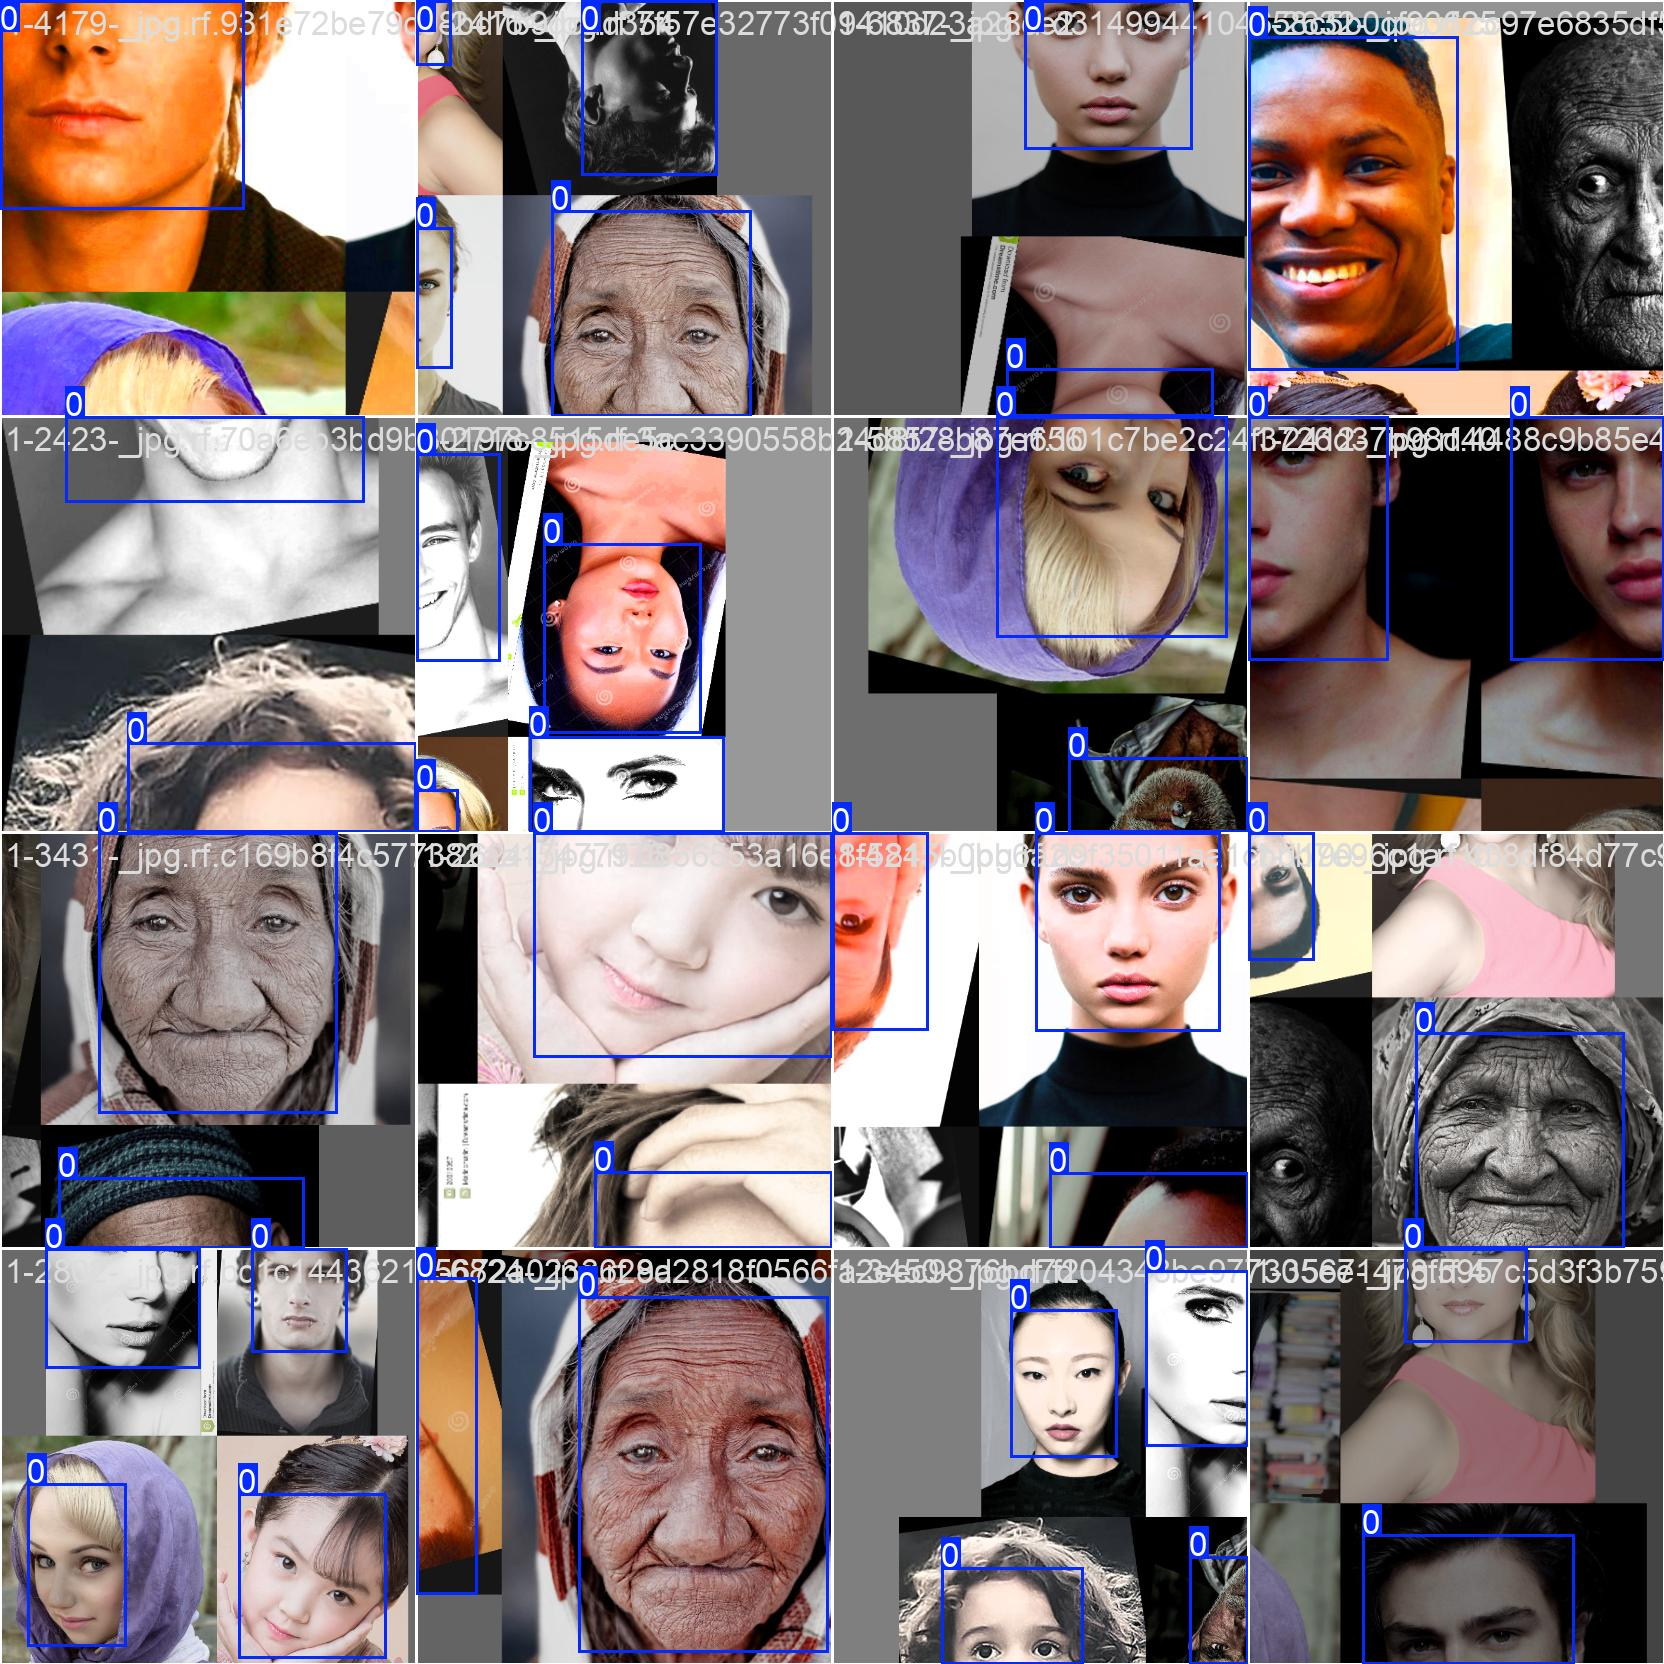

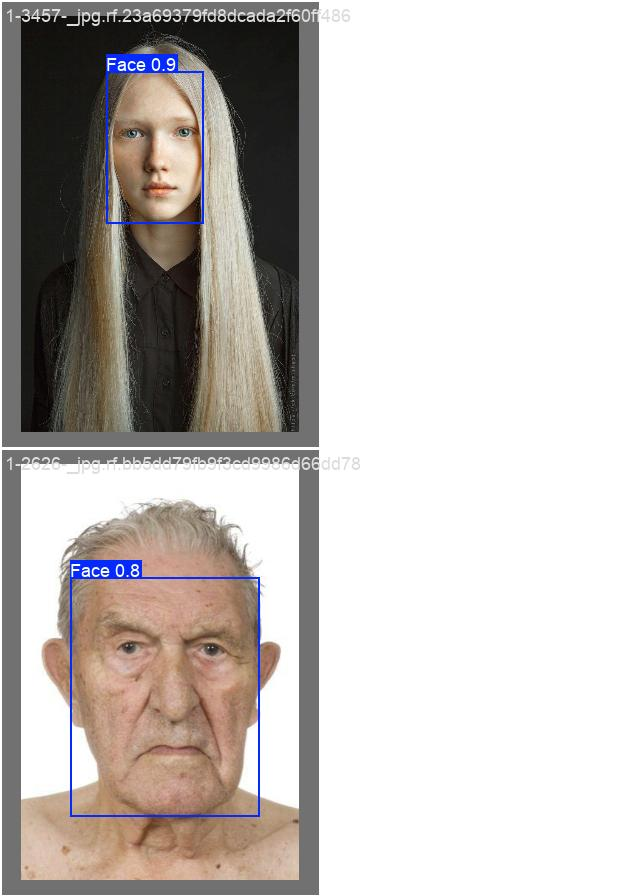

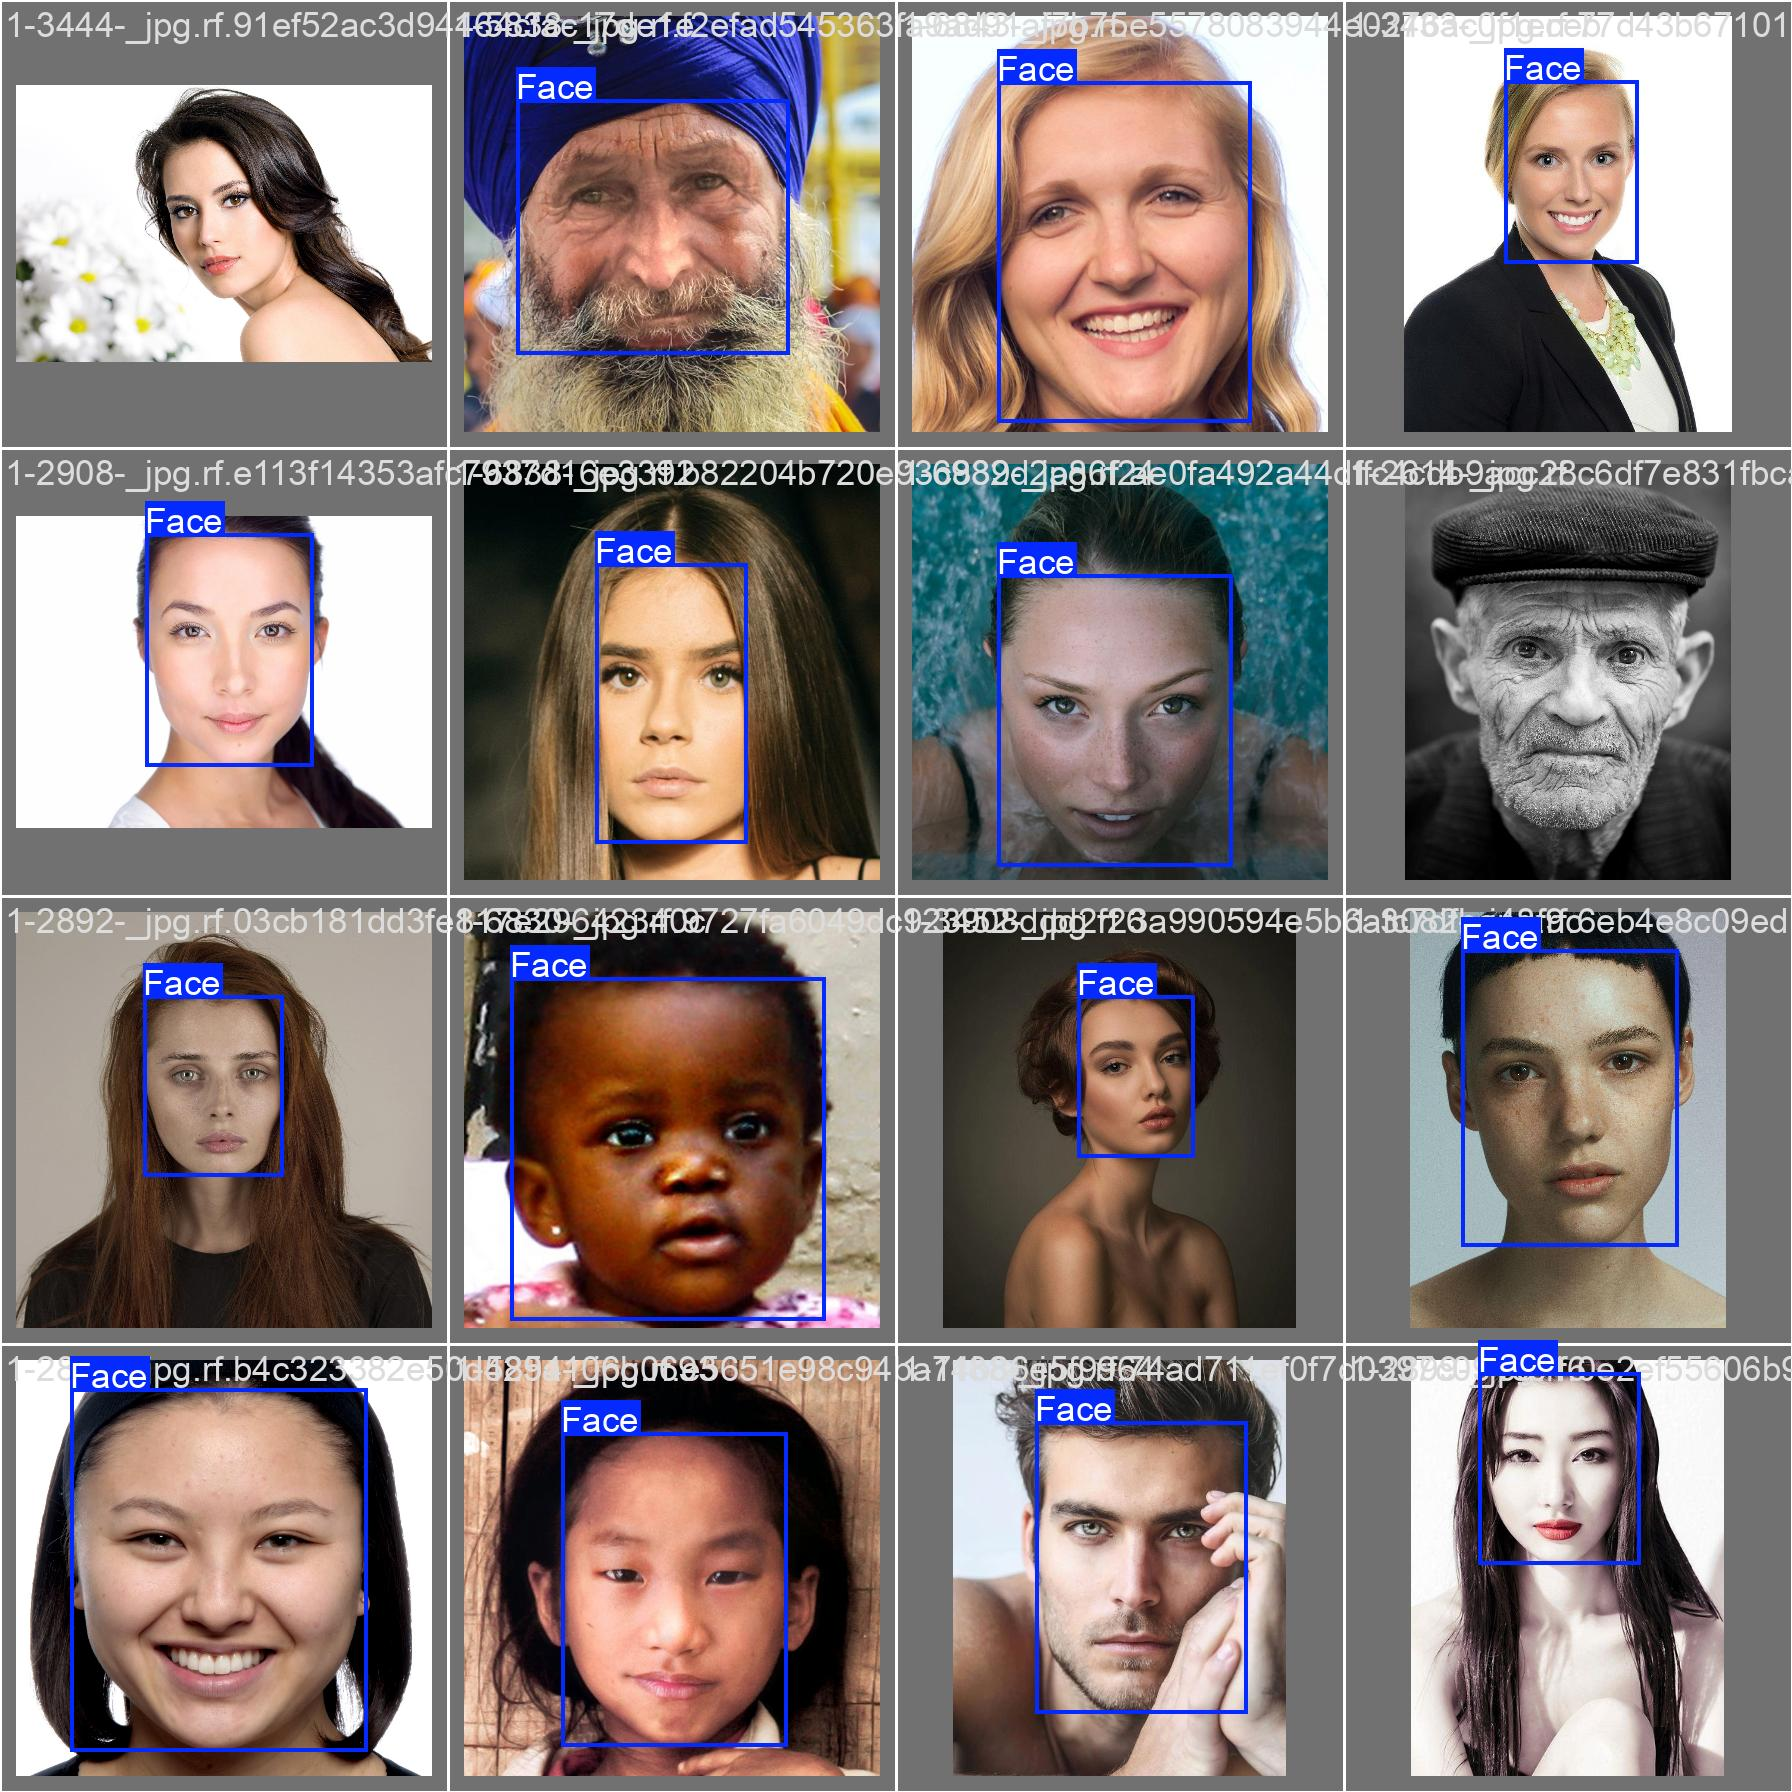

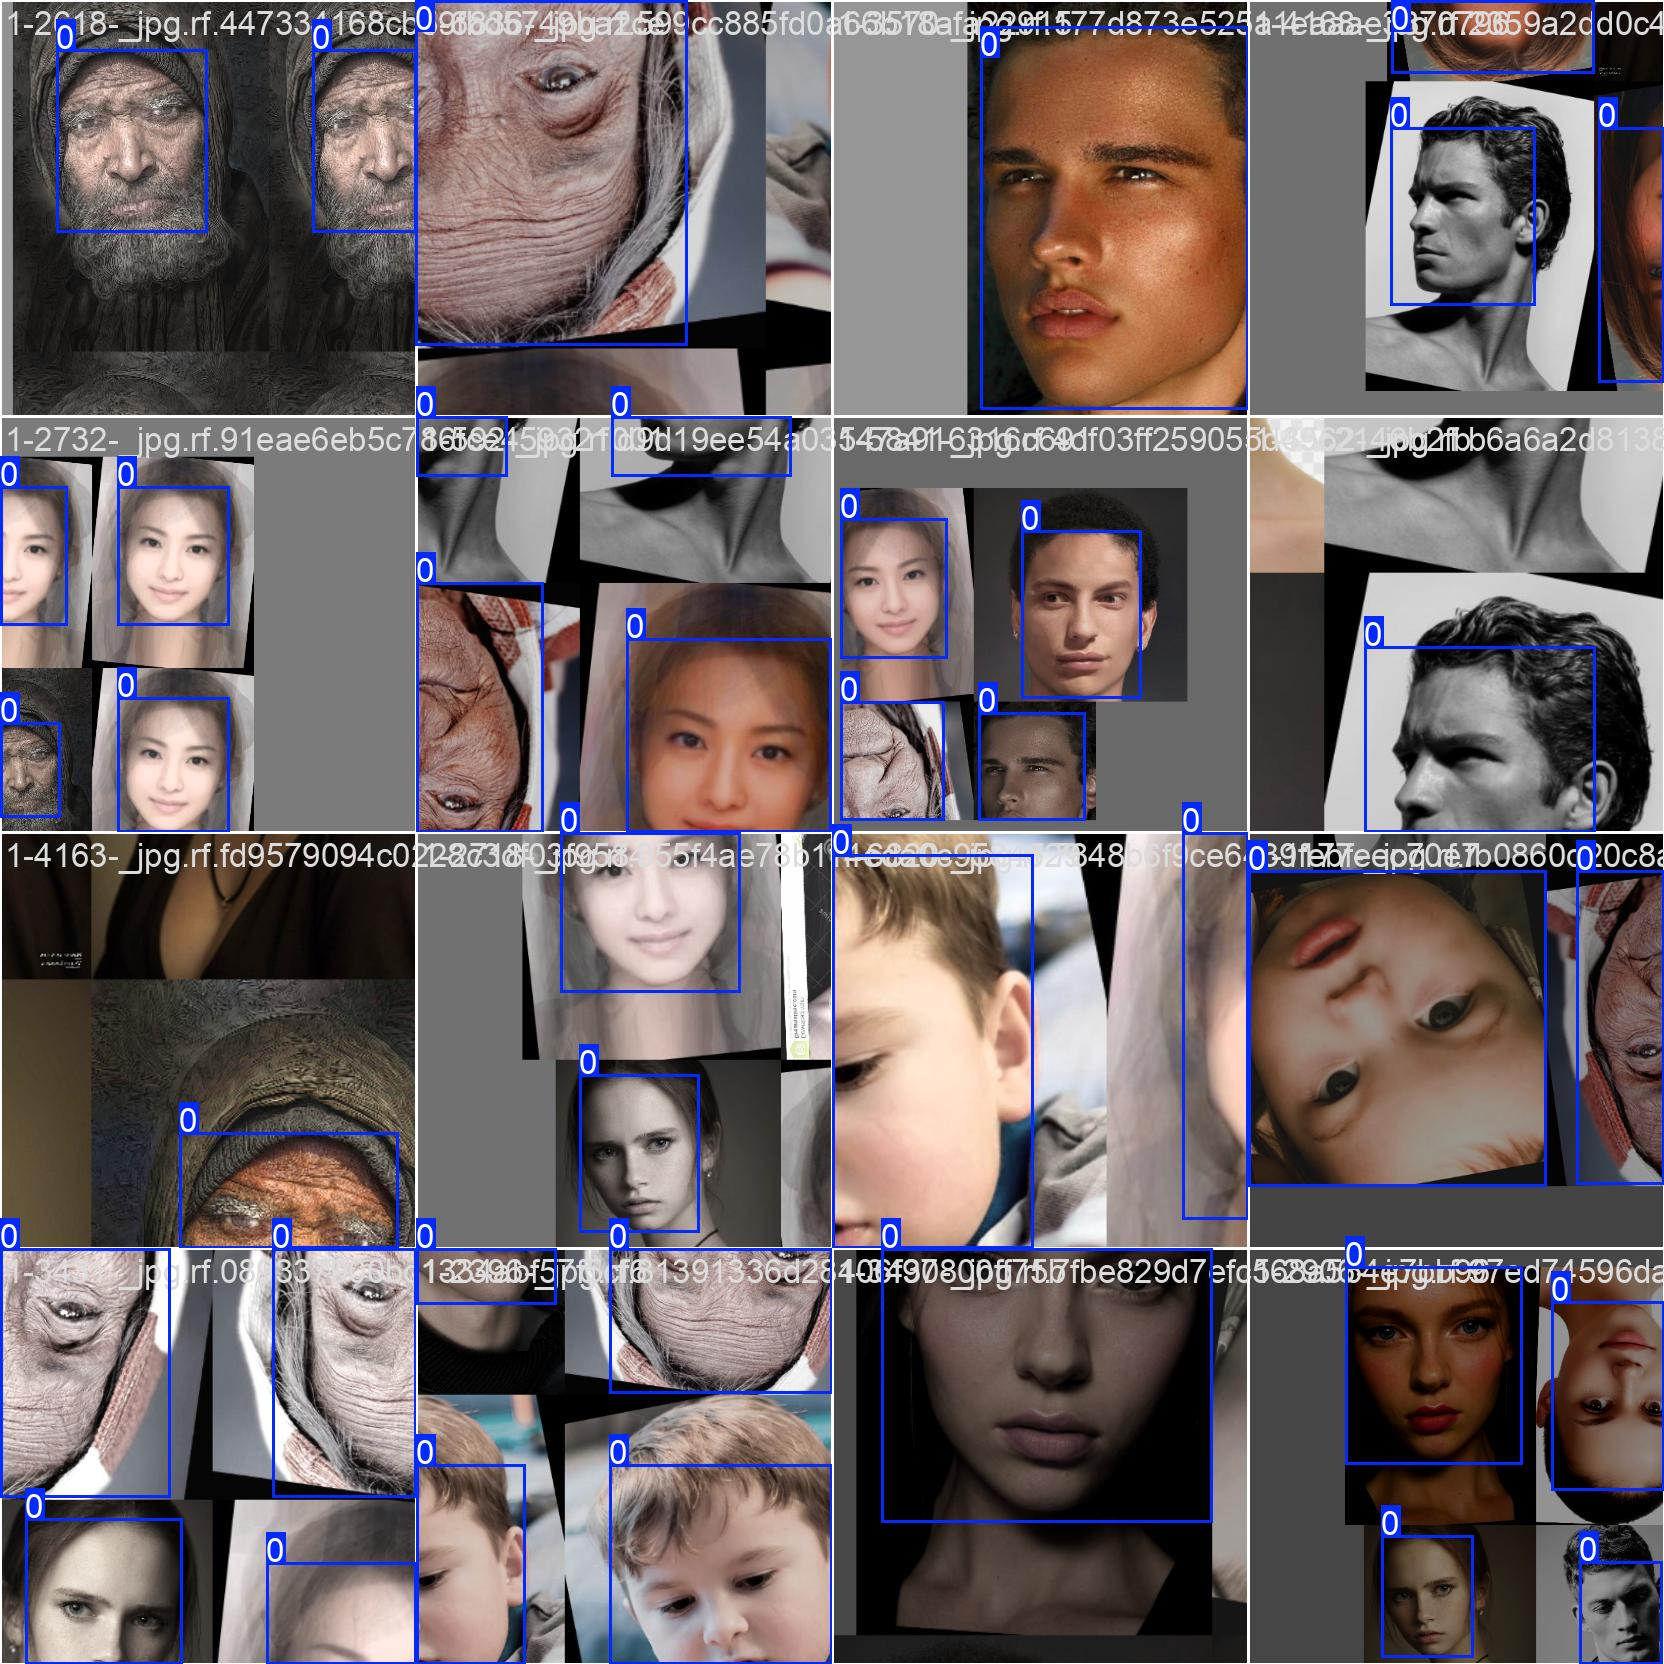

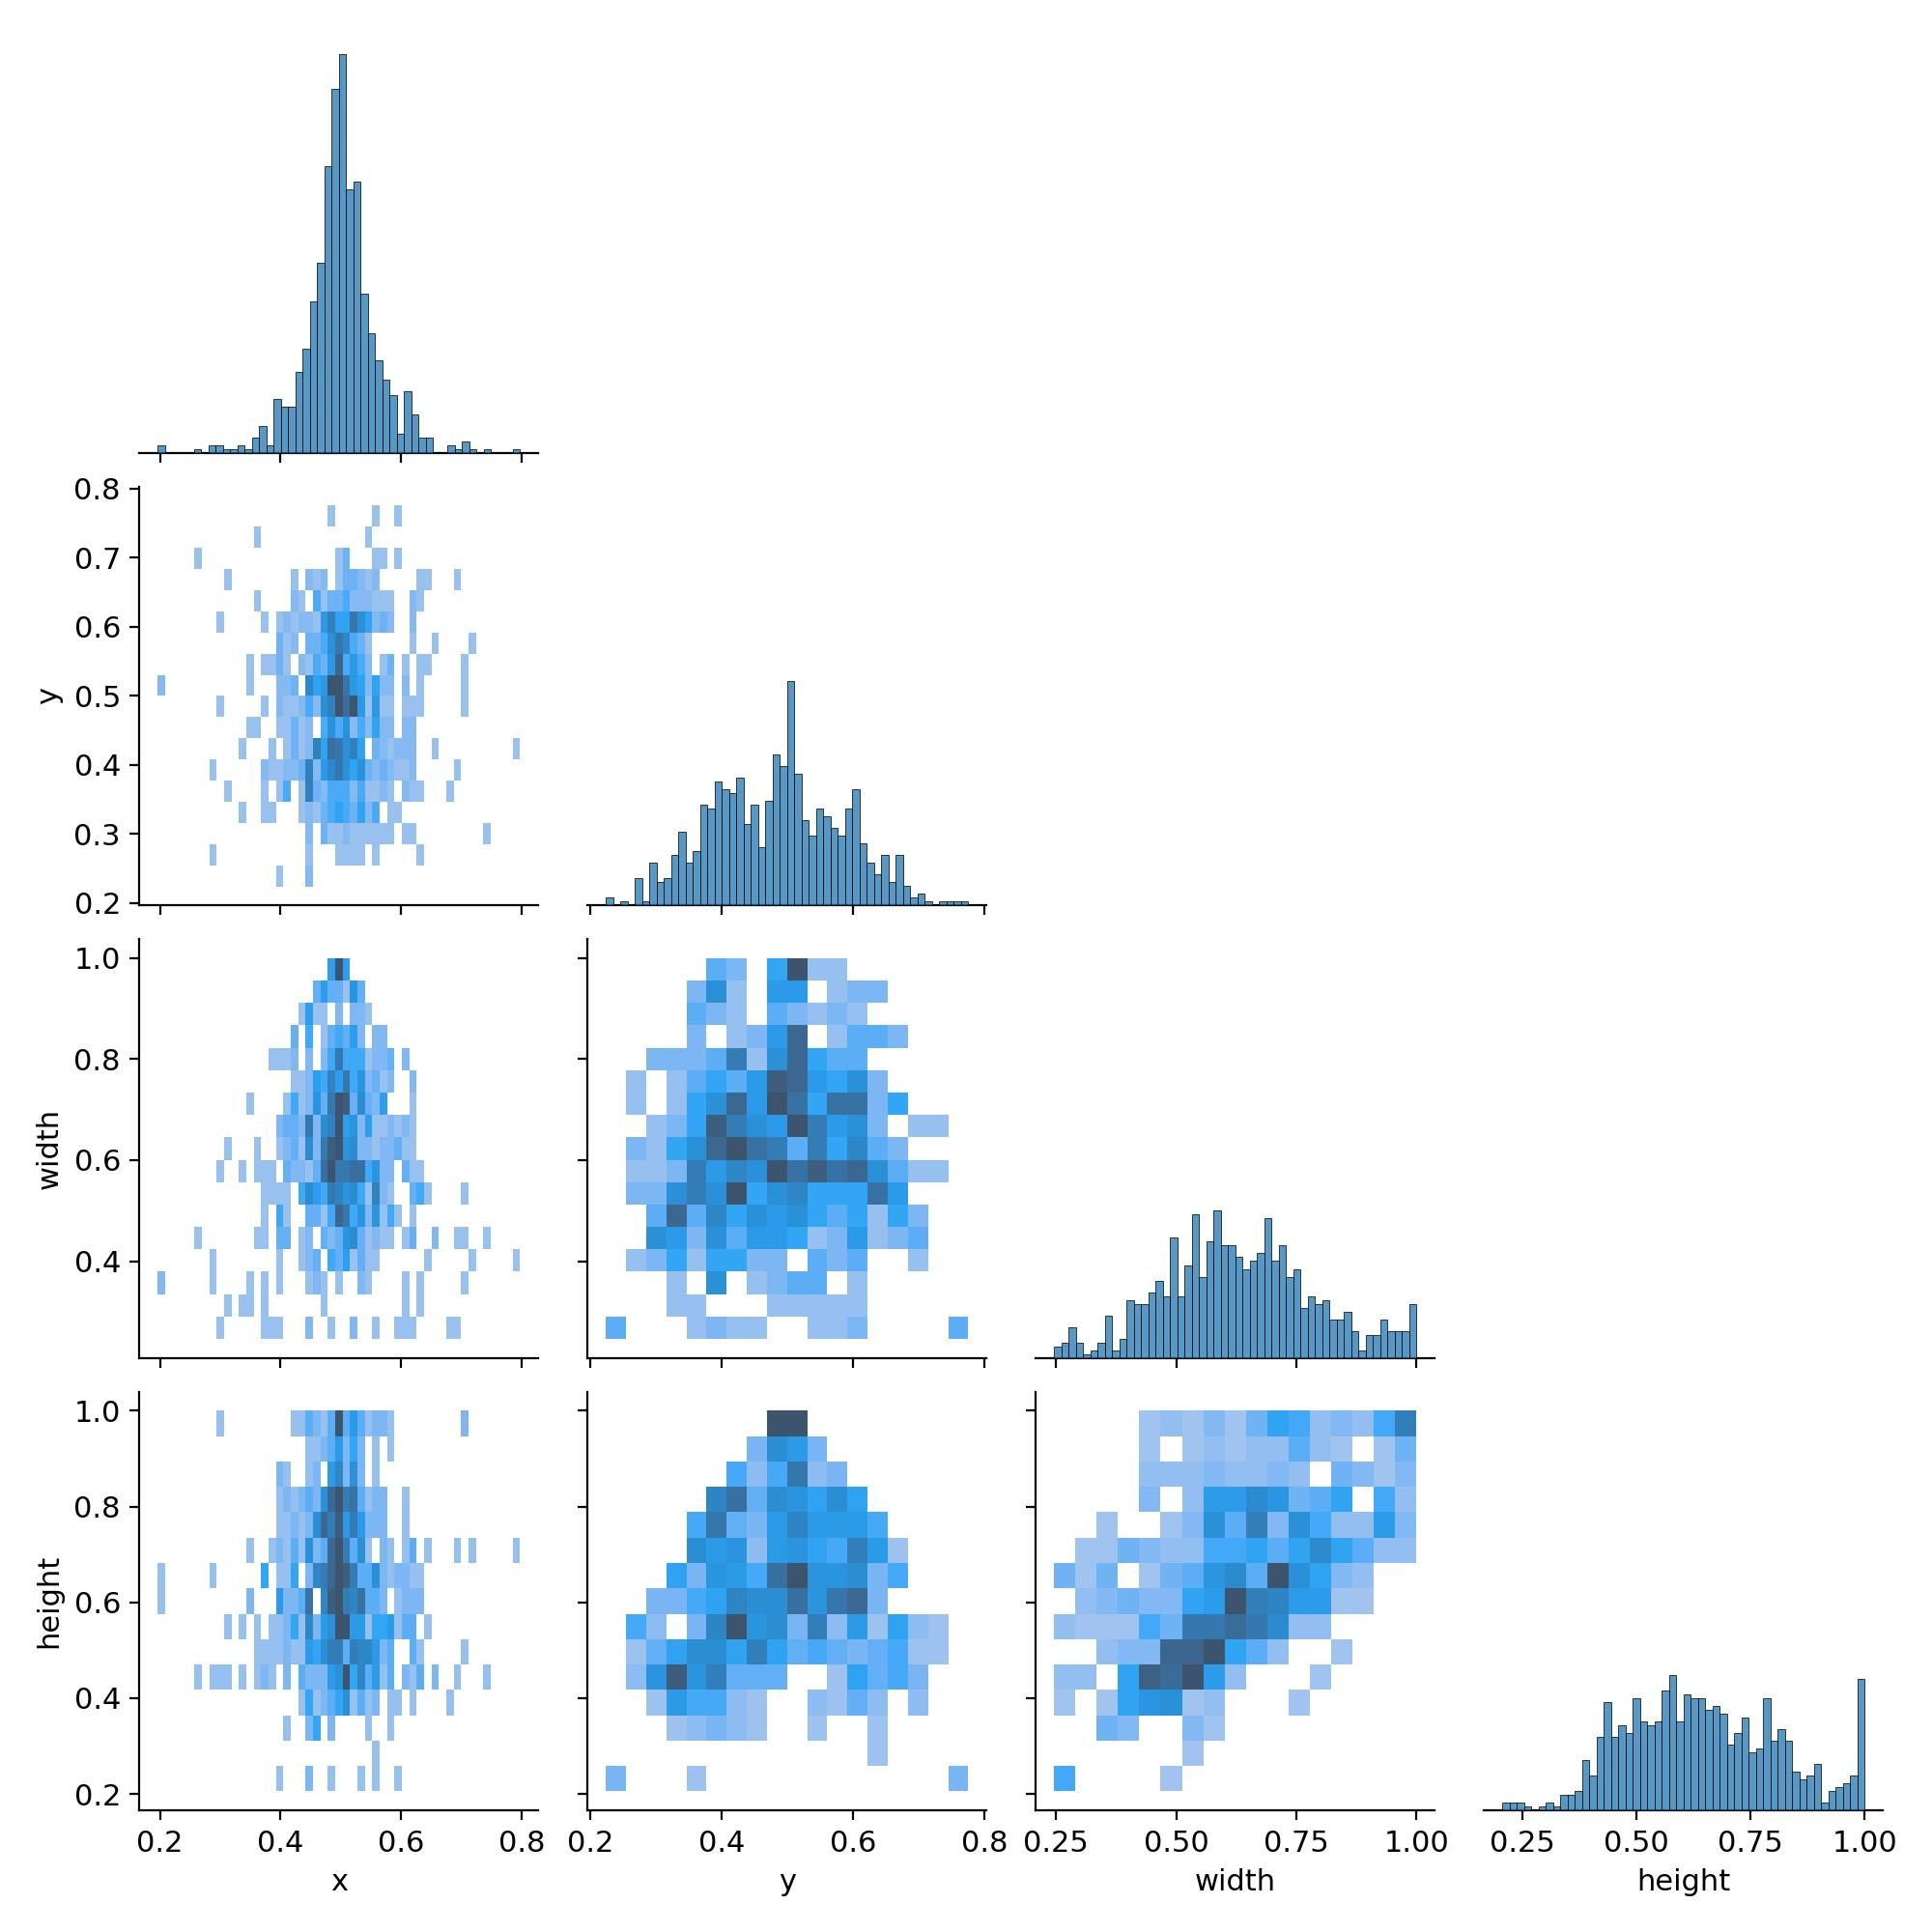

In [11]:
import os
from IPython.display import Image, display

prediction_dir = "/kaggle/working/runs/detect/roboflow_yolov8"
images = [os.path.join(prediction_dir, f) for f in os.listdir(prediction_dir) if f.endswith(".jpg")]

# Show a few prediction samples
for img_path in images[:5]:
    display(Image(filename=img_path))